In [114]:
import tensorflow as tf
import os

def load_image_dataset(folder1_path, folder2_path, image_size=(224, 224)):

    image_list = []
    label_list = []

    # Load images from folder1
    for filename in os.listdir("/content/glass"):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions if needed
            image_path = os.path.join(folder1_path, filename)
            image_list.append(image_path)
            label_list.append(0)

    # Load images from folder2
    for filename in os.listdir("/content/no_glass"):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  #
            image_path = os.path.join(folder2_path, filename)
            image_list.append(image_path)
            label_list.append(1)

    dataset = tf.data.Dataset.from_tensor_slices((image_list, label_list))

    def load_and_preprocess_image(image_path, label):
      image = tf.io.read_file(image_path)
      image = tf.image.decode_jpeg(image, channels=3)  # Assuming RGB images
      image = tf.image.resize(image, image_size)
      image = tf.cast(image, tf.float32) / 255.0 # Normalize to [0, 1]
      return image, label

    dataset = dataset.map(load_and_preprocess_image)

    return dataset







In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt




<Figure size 1200x1200 with 0 Axes>

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

Text(0.5, 0.98, '4x4 Grid of Images from Folder 1')

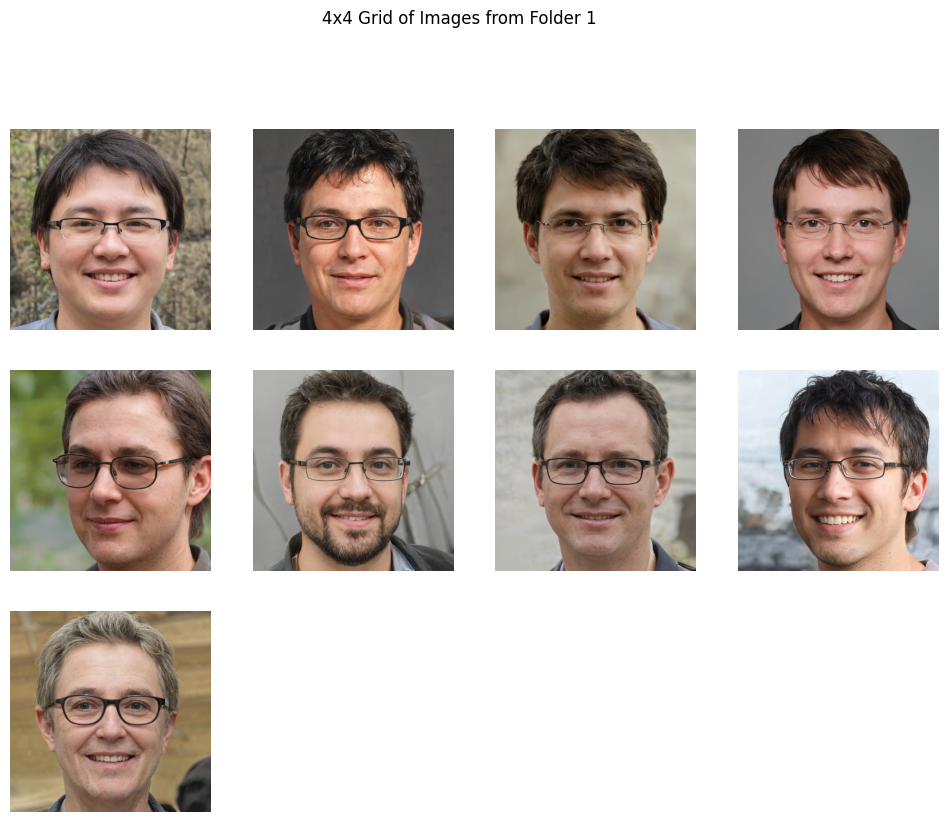

In [116]:
import matplotlib.pyplot as plt
import os


folder1 = "/content/glass"

# Display a 4x4 grid of images from folder1
plt.figure(figsize=(12, 12))
for i, filename in enumerate(os.listdir(folder1)[:9]):  # Adjust number for more or fewer images
    image_path = os.path.join(folder1, filename)
    image = plt.imread(image_path)  # Read the image using imread
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)  # Display the image
    plt.axis('off')
plt.suptitle("4x4 Grid of Images from Folder 1")
plt.show()

<Figure size 1200x1200 with 0 Axes>

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

<Axes: >

(-0.5, 1023.5, 1023.5, -0.5)

Text(0.5, 0.98, '4x4 Grid of Images from Folder 2')

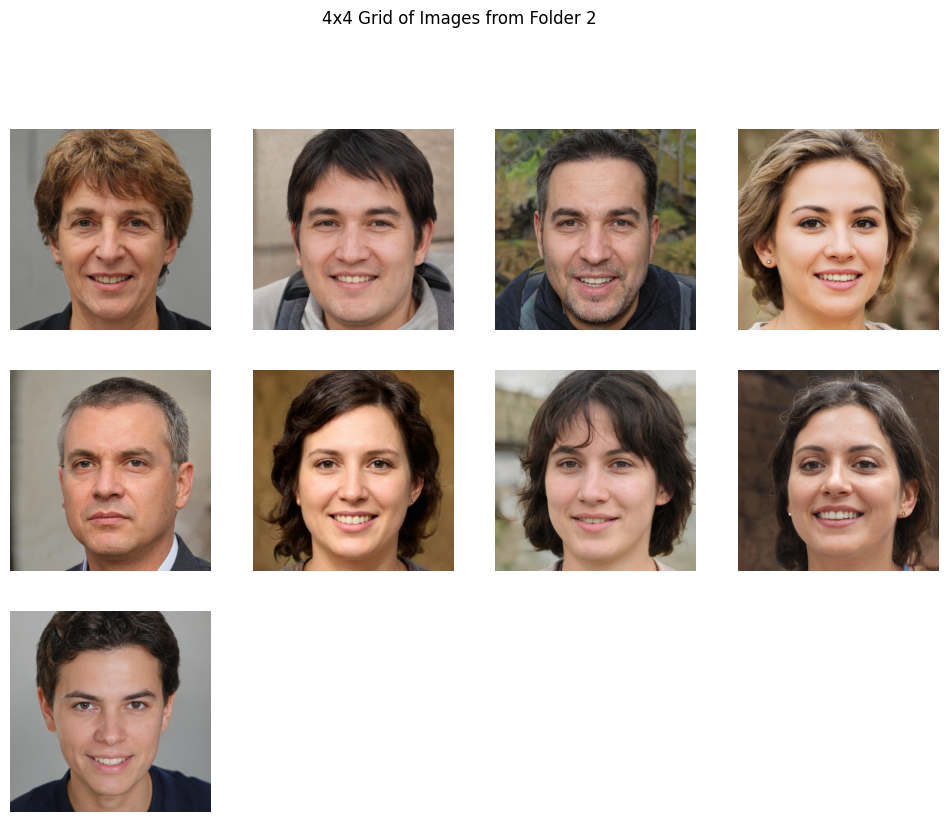

In [117]:
import matplotlib.pyplot as plt
import os


folder2 = "/content/no_glass"

# Display a 4x4 grid of images from folder2
plt.figure(figsize=(12, 12))
for i, filename in enumerate(os.listdir(folder2)[:9]):
    image_path = os.path.join(folder2, filename)
    image = plt.imread(image_path)  # Read the image using imread
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)  # Display the image
    plt.axis('off')
plt.suptitle("4x4 Grid of Images from Folder 2")
plt.show()

In [118]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
import tensorflow as tf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Parameters
BATCH_SIZE = 8
BUFFER_SIZE = 1000

# Load the dataset
dataset = load_image_dataset("/content/glass", "/content/no_glass")

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)

# Calculate the total number of samples
dataset_size = sum(1 for _ in dataset.unbatch())  # Total number of images (samples)

# Calculate split sizes based on the dataset size
train_size = int(0.7 * dataset_size)  # 70% for training
val_size = int(0.2 * dataset_size)    # 20% for validation
test_size = dataset_size - train_size - val_size  # Remaining 10% for testing

# Split the dataset
train_dataset = dataset.take(train_size // BATCH_SIZE)
remaining_dataset = dataset.skip(train_size // BATCH_SIZE)
val_dataset = remaining_dataset.take(val_size // BATCH_SIZE)
test_dataset = remaining_dataset.skip(val_size // BATCH_SIZE)

print(f"Total dataset size: {dataset_size} samples")
print(f"Train dataset size: {train_size} samples")
print(f"Validation dataset size: {val_size} samples")
print(f"Test dataset size: {test_size} samples")


Total dataset size: 86 samples
Train dataset size: 60 samples
Validation dataset size: 17 samples
Test dataset size: 9 samples


In [120]:
# Confirm dataset structure
print("Train dataset batch example:")
for images, labels in train_dataset.take(1):
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)

print("Validation dataset batch example:")
for images, labels in val_dataset.take(1):
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)

Train dataset batch example:
Images batch shape: (8, 224, 224, 3)
Labels batch shape: (8,)
Validation dataset batch example:
Images batch shape: (8, 224, 224, 3)
Labels batch shape: (8,)


In [121]:
# Compile the model before training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7047 - val_accuracy: 0.6875 - val_loss: 0.6002
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8440 - val_accuracy: 0.7500 - val_loss: 1.5358
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 2.8249 - val_accuracy: 0.5000 - val_loss: 1.5401
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.7399 - val_accuracy: 0.6250 - val_loss: 0.6535
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5216 - val_accuracy: 0.6875 - val_loss: 0.6627
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6459 - val_accuracy: 0.5625 - val_loss: 0.6850
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 0.7034 - val_accuracy: 0.6250 - val_loss: 0.6588
Epoch 8/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6414
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3750 - loss: 0.7284 - val_accuracy: 0.7500 - val_loss: 0.5901
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4775 - val_accuracy: 0.8125 - val_loss: 0.4825
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.5103 - val_accuracy: 0.6250 - val_loss: 0.8334
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6422 - val_accuracy: 0.6250 - val_loss: 0.8412
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1260 - val_accuracy: 0.8125 - val_loss: 0.5340
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.8342 - val_accuracy: 0.7500 - val_loss: 0.6014
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6564 - val_accuracy: 0.7500 - val_loss: 0.5404
Epoch 16/2

<Figure size 600x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Without Glasses')

<Axes: >

Text(0.5, 1.0, 'With Glasses')

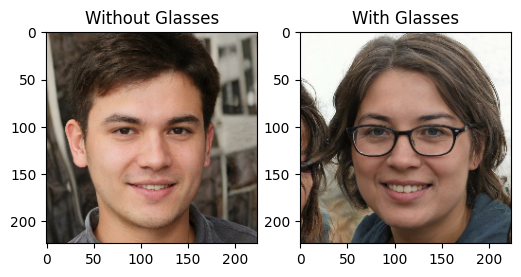

In [131]:
import tensorflow as tf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np

# Get a single batch of data from the training dataset
for images, labels in train_dataset.take(1):
    train_data = images.numpy()  # Convert to NumPy array
    train_labels = labels.numpy()

# Plot Sample Images for Each Class
sample_with_glasses = train_data[0]  # Assuming the first image is with glasses
# Check if there is at least one label with '0' (without glasses)
without_glasses_indices = np.where(train_labels == 0)[0]

if without_glasses_indices.size > 0:
    sample_without_glasses = train_data[without_glasses_indices[0]]
else:
    sample_without_glasses = None  # If no samples without glasses are found

# Plot the images
plt.figure(figsize=(6, 6))

# Plot sample with glasses
plt.subplot(1, 2, 1)
plt.imshow(sample_with_glasses)
plt.title("Without Glasses")

# Plot sample without glasses, if found
if sample_without_glasses is not None:
    plt.subplot(1, 2, 2)
    plt.imshow(sample_without_glasses)
    plt.title("With Glasses")
else:
    print("No samples without glasses found in this batch.")

plt.show()